In [ ]:
#Importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd
import os

In [ ]:
#Importing dataset file

In [7]:
df=pd.read_csv(r'C:/Users/Vidhya/Downloads/loan_prediction.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#We see that there are 612 rows and 13 columns

In [11]:
df.shape

(614, 13)

In [ ]:
#Storing only the columns in a variable

In [12]:
df_columns=df.columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
#Getting the mathematical details of our data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#We see that there are 13 features, 3 types of datatype: float, int and object.

In [ ]:
#Checking for any null values

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#We see that there are null values

In [ ]:
#Detecting the number/count of object datatype values

In [16]:
def explore_object_type(df ,feature_name):
     if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [ ]:
#Checking for gender

In [17]:
explore_object_type(df, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [19]:
for featureName in df_columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Count is:')
        explore_object_type(df, str(featureName))


"Loan_ID's" Count is:
LP002767    1
LP002804    1
LP002239    1
LP001205    1
LP001904    1
           ..
LP001430    1
LP001945    1
LP001345    1
LP002158    1
LP002893    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Count is:
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Count is:
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Count is:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Count is:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Count is:
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Count is:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Count is:
Y    422
N    192
Name: Loan_Status, dtype: int64


In [ ]:
#Treating the null values
#Replacing null values with mean and mode

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [22]:
df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})
df.Married = df.Married.replace({"Yes": 1, "No" : 0})
df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})


In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [ ]:
#Property area, dependents and Area have many values, hence using Label encoder

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
feat_col=['Property_Area','Education', 'Dependents']
le=LabelEncoder()
for col in feat_col:
    df[col]=le.fit_transform(df[col])

In [ ]:
#Now all the features are converted to single datatype that is numerical

In [ ]:
#Visualizing the data

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

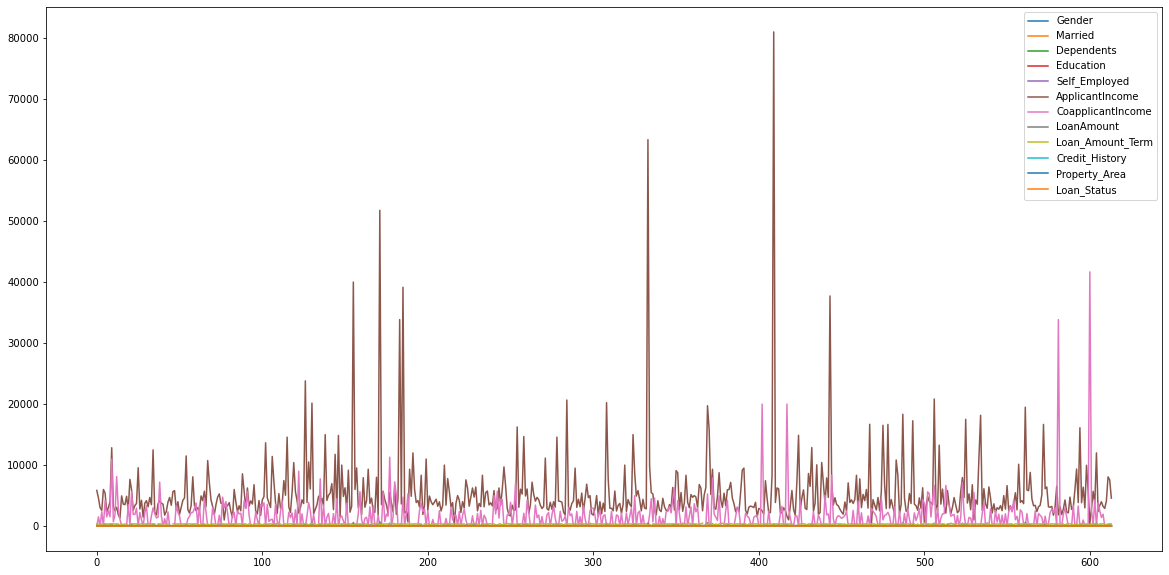

In [27]:
df.plot(figsize=(20,10))
plt.show()

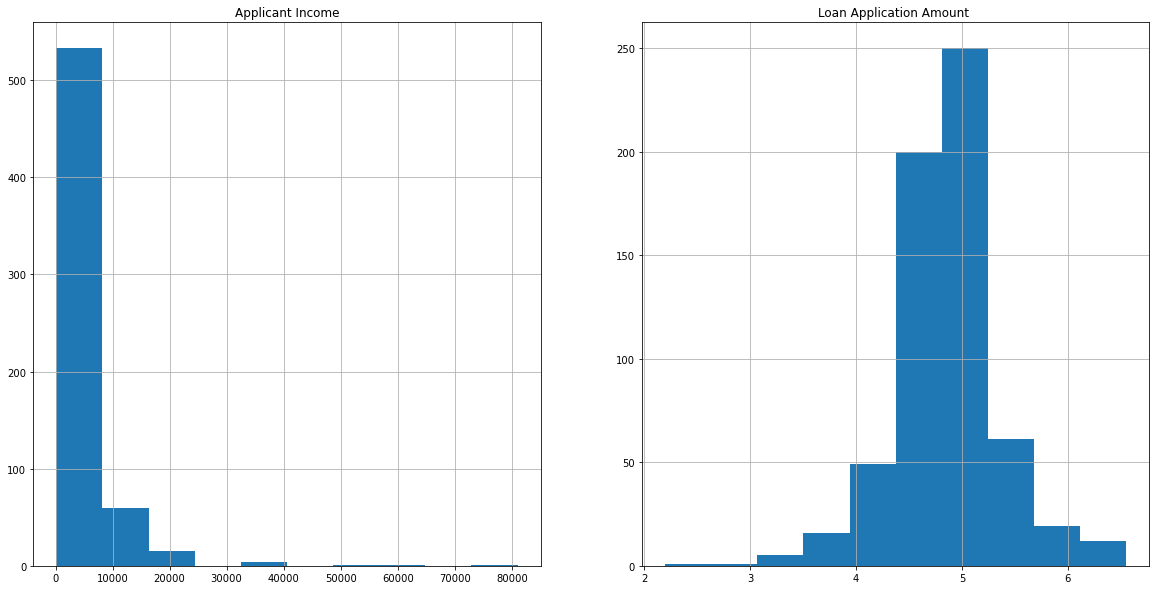

In [28]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df['ApplicantIncome'].hist(bins=10)
plt.title("Applicant Income")
plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Loan Application Amount ")
plt.show()

In [ ]:
#We see that Applicant income has highest values between 0 and 25000.
#We see that Loan Apllication Amount has highest values between 3 and 6.

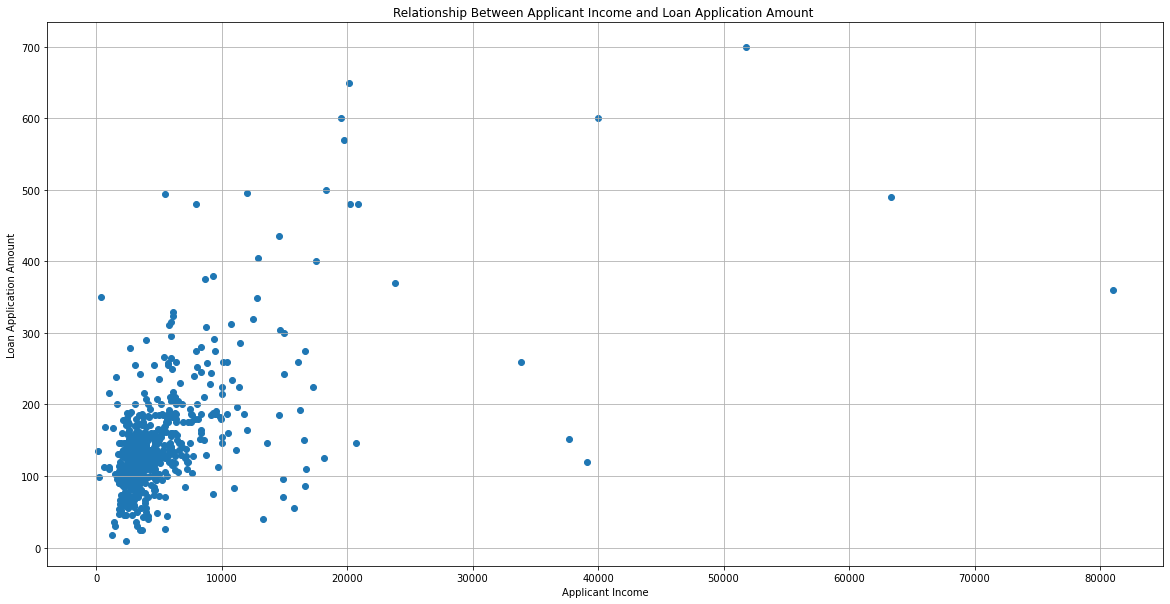

In [29]:
plt.figure(figsize=(20,10))
plt.title("Relationship Between Applicant Income and Loan Application Amount ")
plt.grid()
plt.scatter(df['ApplicantIncome'] ,df['LoanAmount'])
plt.xlabel("Applicant Income")
plt.ylabel("Loan Application Amount")
plt.show()

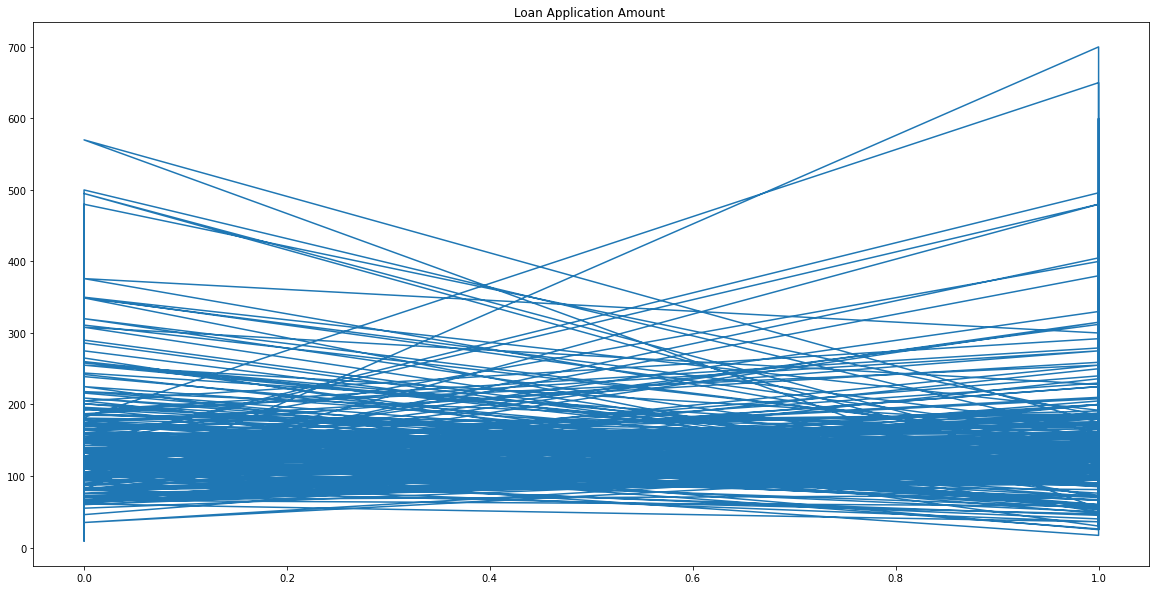

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df['Loan_Status'], df['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

In [ ]:
#Determining the correlation among the variables using heatmap

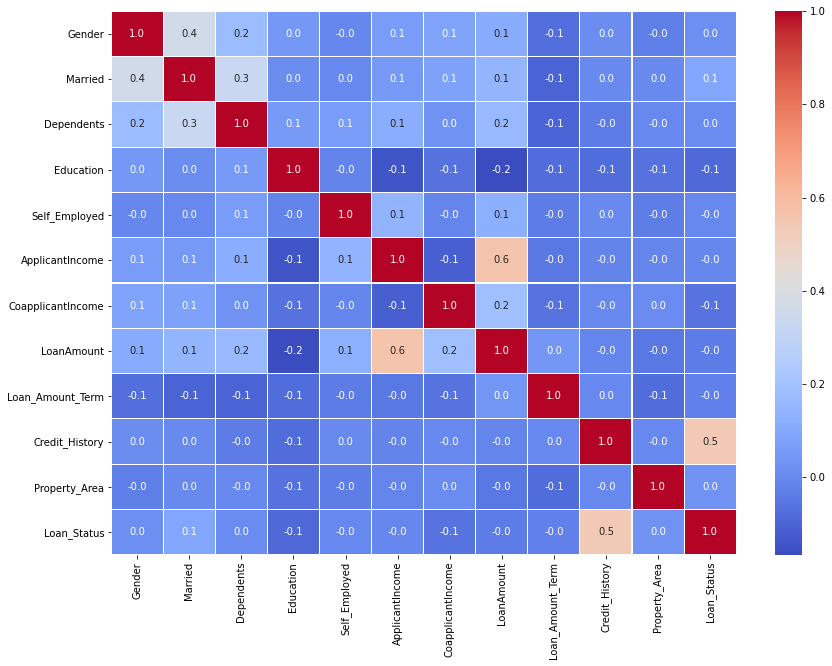

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [ ]:
#LOgistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [33]:
lr=LogisticRegression()

In [ ]:
#Training the model

In [37]:
train_features = ['Credit_History', 'Education', 'Gender']
x_train = df[train_features].values
y_train = df['Loan_Status'].values
x_test = df[train_features].values

In [38]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Predicting the model

In [39]:
pred = lr.predict(x_test)
print('Coefficient of model :', lr.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [ ]:
#checking the intercept of the model

In [40]:
print('Intercept of model',lr.intercept_)

Intercept of model [-1.98307795]


In [ ]:
#Checking the accuracy score

In [41]:
score = lr.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [ ]:
#Predicting target on test data

In [42]:
predict_test = lr.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 

In [ ]:
#Saving the file with pickle

In [43]:
import pickle as pkl

In [44]:
filename = 'lr.pkl'
pkl.dump(lr, open(filename, 'wb'))

In [50]:
loaded_model = pkl.load(open(filename, 'rb'))
result = loaded_model.score(x_test, predict_test)

In [ ]:
#We have got the accuracy score as 0.809. Hence the loan of the applicant will be approved based on our model